![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MAXIMUM DRAWDOWN**

## **¿How to calculate maximum drawdown for a financial asset?**

<font size="3"> A drawdown is an investment term that refers to the decline in value of a single investment or an investment portfolio from a relative peak value to a relative trough. A drawdown is an important risk factor for investors to consider. It is another dimension of risk, different from the volatility calculation that we learnt <a href="https://quant-trading.co/how-to-calculate-volatility/" target="_blank">here</a>
<br><br>

In [11]:
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf  #Yahoo Finance
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## **Get an specific ticker**

<font size="3"> Stocks have an specific identification code. For example the APPLE's stock identifier is AAPL. Here we show how to download the prices history for the stock for an specific time frame.
<br><br>

In [2]:
#ASSET
ticker = 'AAPL'
my_ticker = yf.Ticker(ticker)

start_date = datetime.datetime(1990, 12, 31)
end_date = datetime.datetime(2024, 2, 29)

prices_hist = my_ticker.history(start=start_date,end=end_date)

<font size="3"> We can have a visual inspection of the DataFrame.
<br><br>

In [3]:
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0


## **Express the dividend as a nominal return**

<font size="3"> The next step is to calculte the dividend as a percentage. That can be done easily dividing the dividends by the closing price. That can be interpreted as an extra return that is paid in that moment. For example, you can see that Apple stock paid USD 0.24 on november 11th 2023. The closing price of the stock was 186.162445, which mean that the dividends represent a nominal return of 0.1289%. 
<br><br>

In [4]:
prices_hist['Perc_Dividends']=prices_hist['Dividends']/prices_hist['Close']
prices_hist.loc[prices_hist['Perc_Dividends']!=0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends
Date,,,,,,,,
1991-02-15,0.410211,0.419167,0.410211,0.412898,365612800,0.001071,0.0,0.002594
1991-05-20,0.339424,0.341220,0.316078,0.317873,262169600,0.001071,0.0,0.003369
1991-08-19,0.356390,0.371690,0.349191,0.363590,322481600,0.001071,0.0,0.002946
1991-11-18,0.360856,0.378899,0.360856,0.376193,238739200,0.001071,0.0,0.002847
1992-02-14,0.460952,0.464567,0.457336,0.463664,72587200,0.001071,0.0,0.002310
...,...,...,...,...,...,...,...,...
2023-02-10,148.666478,150.536486,148.427747,150.208237,57450700,0.230000,0.0,0.001531
2023-05-12,172.937047,173.375319,170.327358,171.891190,45497800,0.240000,0.0,0.001396
2023-08-11,176.861019,178.157642,176.093008,177.329788,51988100,0.240000,0.0,0.001353


## **Calculate the total return for each date**

<font size="3"> To calculate the total return for each date we can simply add the dividend's return plus the price return. We will also assign a "zero" to the first row, since we don't have a previous price to calculate a return.
<br><br>

In [5]:
prices_hist['Return'] = prices_hist['Close']/ prices_hist['Close'].shift(1)-1+prices_hist['Perc_Dividends']
prices_hist['Return'].iloc[0] = 0
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends,Return
Date,,,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0,0.0,0.000000
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0,0.0,0.011627
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0,0.0,-0.011494
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0,0.0,0.005813
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0,0.0,0.011244
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0,0.0,-0.010034
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0,0.0,-0.007451


## **Calculate the cumulative total return**

<font size="3"> Then we can use the function cumprod(). We can use it on the whole DataFrame applying the function on the quantity (1+ 'Return').
<br><br>

In [6]:
prices_hist['Cum_Return']=(1 + prices_hist['Return']).cumprod() - 1
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends,Return,Cum_Return
Date,,,,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0,0.0,0.000000,0.000000
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0,0.0,0.011627,0.011627
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0,0.0,-0.011494,0.000000
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0,0.0,0.005813,0.005813
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0,0.0,0.000000,0.005813
...,...,...,...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0,0.0,0.011244,767.741236
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0,0.0,-0.010034,760.027594
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0,0.0,-0.007451,754.356993


## **Calculate a new quantity known as Wealth Index**

<font size="3"> This quantity is basically how an initial investment of USD100 has evolved throughout the years:
<br><br>

In [8]:
prices_hist['Wealth_Index']=100*(1 + prices_hist['Cum_Return'])
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends,Return,Cum_Return,Wealth_Index
Date,,,,,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0,0.0,0.000000,0.000000,100.000000
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0,0.0,0.011627,0.011627,101.162726
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0,0.0,-0.011494,0.000000,100.000000
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0,0.0,0.005813,0.005813,100.581334
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0,0.0,0.000000,0.005813,100.581334
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0,0.0,0.011244,767.741236,76874.123637
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0,0.0,-0.010034,760.027594,76102.759376
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0,0.0,-0.007451,754.356993,75535.699346


## **Calculate a new quantity known as Previous Peak**

<font size="3"> This quantity tracks the maximum from previous periods. If you get a new maximum, the previous maximum ceases to exists from that point in time and is replaced by each new maximum:
<br><br>

In [9]:
prices_hist['Prev_Peak']=prices_hist['Wealth_Index'].cummax()
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends,Return,Cum_Return,Wealth_Index,Prev_Peak
Date,,,,,,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0,0.0,0.000000,0.000000,100.000000,100.000000
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0,0.0,0.011627,0.011627,101.162726,101.162726
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0,0.0,-0.011494,0.000000,100.000000,101.162726
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0,0.0,0.005813,0.005813,100.581334,101.162726
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0,0.0,0.000000,0.005813,100.581334,101.162726
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0,0.0,0.011244,767.741236,76874.123637,82393.544981
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0,0.0,-0.010034,760.027594,76102.759376,82393.544981
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0,0.0,-0.007451,754.356993,75535.699346,82393.544981


## **Calculate the Maximum Drawdown**

<font size="3"> Maximum drawdown is basically the negative return you get from the actual wealth index when you compared it to the previous peak. If you are at a new maximum this quantity will be zero. Otherwise you will get a negative number. Maximum drawdown shows how much of your investment you would have lost if you have a long position in an asset and you didn't liquidate it. 
<br><br>

In [10]:
prices_hist['Max_Drawdown']= (prices_hist['Wealth_Index']-prices_hist['Prev_Peak'])/prices_hist['Prev_Peak']
prices_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Dividends,Return,Cum_Return,Wealth_Index,Prev_Peak,Max_Drawdown
Date,,,,,,,,,,,,,
1990-12-31,0.307459,0.309247,0.305671,0.307459,44273600,0.0,0.0,0.0,0.000000,0.000000,100.000000,100.000000,0.000000
1991-01-02,0.305671,0.314609,0.300309,0.311034,154985600,0.0,0.0,0.0,0.011627,0.011627,101.162726,101.162726,0.000000
1991-01-03,0.311034,0.316396,0.307459,0.307459,150180800,0.0,0.0,0.0,-0.011494,0.000000,100.000000,101.162726,-0.011494
1991-01-04,0.307459,0.316396,0.307459,0.309247,141523200,0.0,0.0,0.0,0.005813,0.005813,100.581334,101.162726,-0.005747
1991-01-07,0.307459,0.323547,0.307459,0.309247,310800000,0.0,0.0,0.0,0.000000,0.005813,100.581334,101.162726,-0.005747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0,0.0,0.011244,767.741236,76874.123637,82393.544981,-0.066989
2024-02-23,185.009995,185.039993,182.229996,182.520004,45119700,0.0,0.0,0.0,-0.010034,760.027594,76102.759376,82393.544981,-0.076350
2024-02-26,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0,0.0,-0.007451,754.356993,75535.699346,82393.544981,-0.083233


## **Chart of Maximum Drawdown**

<font size="3"> This is a very simple chart of the maximum drawdown. We will show how to make nicer plots in other notebooks. Stay tuned!
<br><br>

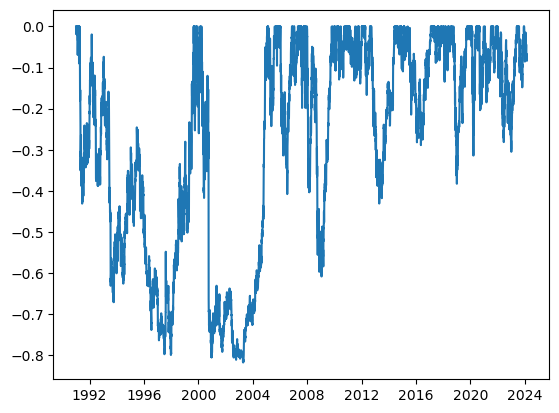

In [13]:
plt.plot(prices_hist['Max_Drawdown'])
plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)